In [2]:
import numpy as np
from dataset import *
from model import *
from utils import *
from train import *

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
"""import shutil
shutil.unpack_archive("/content/gdrive/MyDrive/S18/annotations.zip", "/content/gdrive/MyDrive/S18/annotations")
#shutil.unpack_archive("/content/gdrive/MyDrive/S18/images.zip", "/content/gdrive/MyDrive/S18/images")"""

In [5]:
# Load and View Data`
path1 = '/content/gdrive/MyDrive/S18/images/images/images/'
path2 = '/content/gdrive/MyDrive/S18/annotations/annotations/annotations/trimaps/'

(400, 600, 3)
(400, 600)


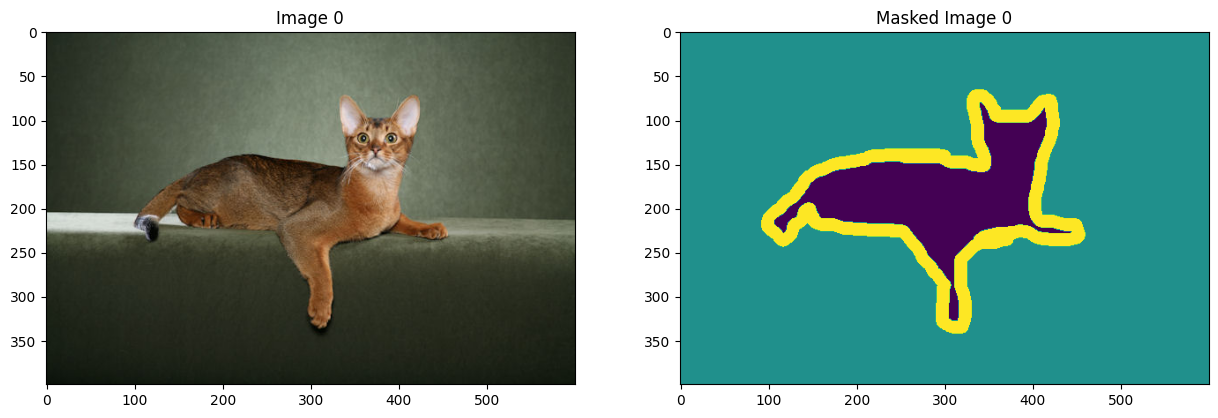

In [8]:
# Load and View Data`
path1 = '/content/gdrive/MyDrive/S18/images/images/images/'
path2 = '/content/gdrive/MyDrive/S18/annotations/annotations/annotations/trimaps/'
img, mask = LoadData(path1, path2)
show_sample_images(path1, path2, img, mask, show_images = 1)

Processing image 3732 out of 3732 images
X Shape: (3732, 128, 128, 3)
Y shape: (3732, 128, 128, 1)


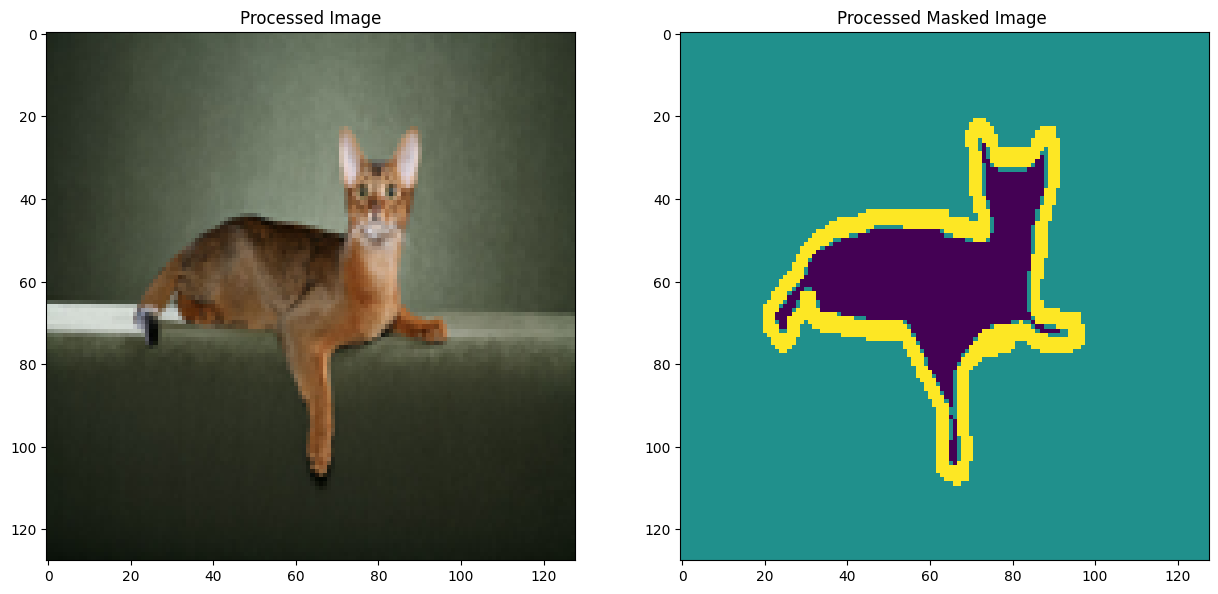

In [9]:
# Process Data
# Define the desired shape
target_shape_img = [128, 128, 3]
target_shape_mask = [128, 128, 1]
# Process data using apt helper function
X, y = PreprocessData(img, mask, target_shape_img, target_shape_mask, path1, path2)

print("X Shape:", X.shape)
print("Y shape:", y.shape)
show_processed_image(X, y, image_index = 0)

## Max Pooling + Transpose Conv + Binary Cross-Entropy

Model Summary:
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 32)         128       ['conv2d_1[0][0]']            
 Normalization)                                                                

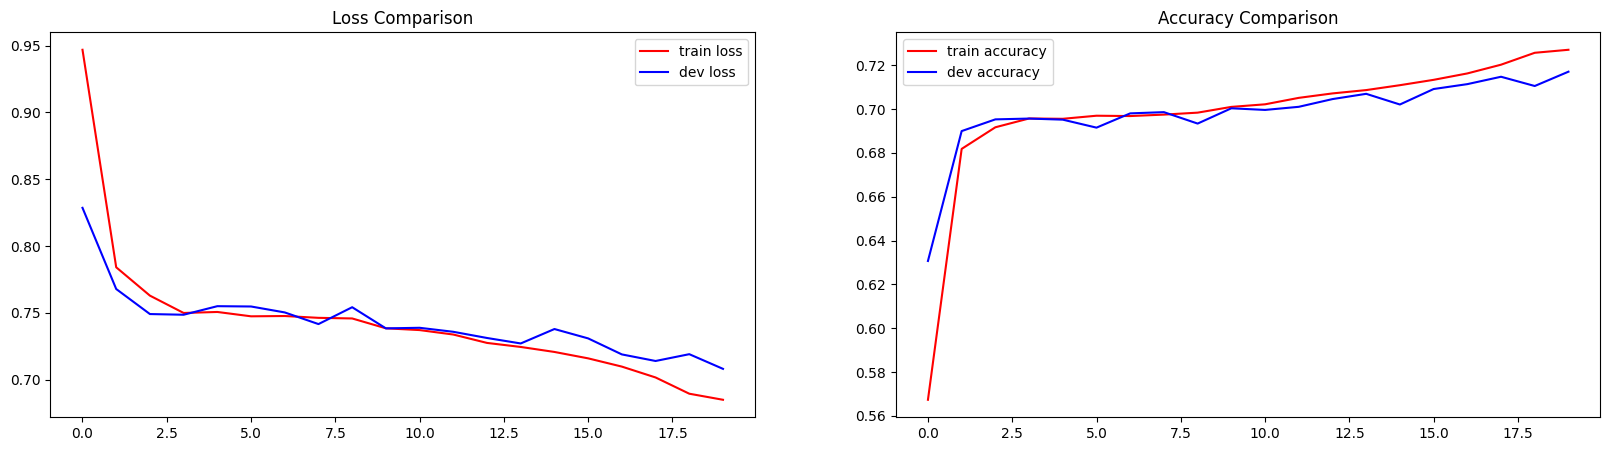

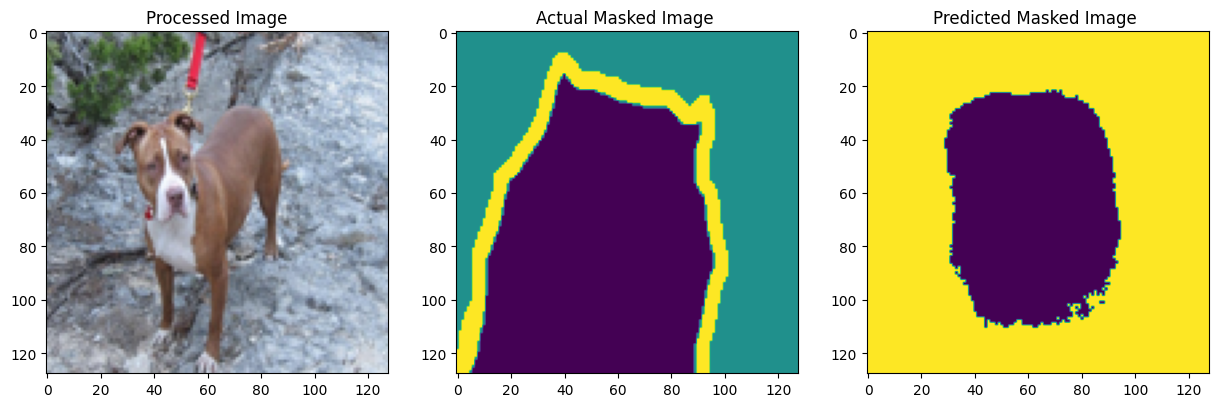

In [10]:
# Initialize the UNet model with different configurations
# Configuration 1: Max Pooling + Transpose Convolution + Binary Cross-Entropy Loss
unet_mp_tr_bce = UNetCompiled(use_max_pooling=True, use_transpose_conv=True, use_strided_conv=False,
                              use_upsampling=False, use_dice_loss=False, use_bce=True)

# Configuration 2: Transpose Convolution + Binary Cross-Entropy Loss with Strided Convolution
# unet_str_tr_bce = UNetCompiled(use_max_pooling=False, use_transpose_conv=True, use_strided_conv=True,
#                                 use_upsampling=False, use_dice_loss=False, use_bce=True)

# Configuration 3: Strided Convolution + Upsampling + Dice Loss (No BCE)
# unet_str_ups_dice = UNetCompiled(use_max_pooling=False, use_transpose_conv=False, use_strided_conv=True,
#                                   use_upsampling=True, use_dice_loss=True, use_bce=False)

# Train the UNet model
results, trained_unet, X_train, X_valid, y_train, y_valid = unet_train(unet_mp_tr_bce, X, y)

# Evaluate the model's performance
model_metrics(results)

# Model Evaluation Results:
# - The training loss consistently decreases, demonstrating effective optimization with Adam.
# - Both the training and validation accuracies are approximately 90%, indicating low bias.
# - The percentage differences between training and validation accuracies are minimal, suggesting low variance.

# Evaluate Predicted Segmentations on Validation Data
trained_unet.evaluate(X_valid, y_valid)

# Visualize Predicted Segmentations for a Specific Index
sample_index = 700
VisualizeResults(X_valid, trained_unet, y_valid, sample_index)


## Max Pooling + Transpose Conv + Dice Loss

Model Summary:
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 128, 128, 32)         896       ['input_2[0][0]']             
                                                                                                  
 conv2d_21 (Conv2D)          (None, 128, 128, 32)         9248      ['conv2d_20[0][0]']           
                                                                                                  
 batch_normalization_5 (Bat  (None, 128, 128, 32)         128       ['conv2d_21[0][0]']           
 chNormalization)                                                            

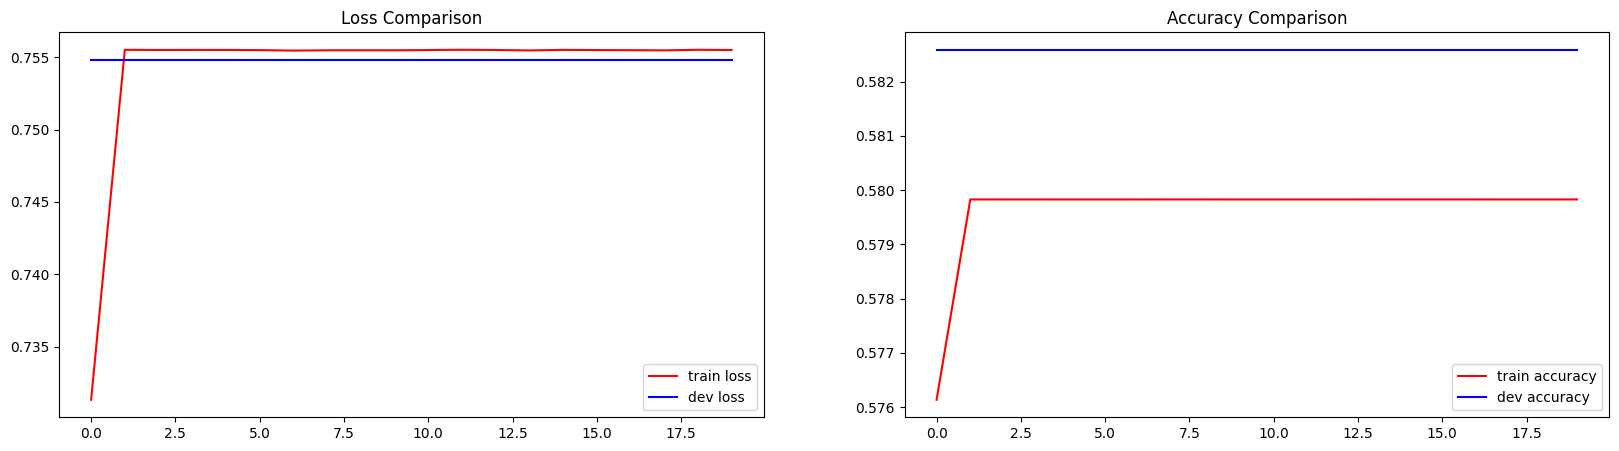

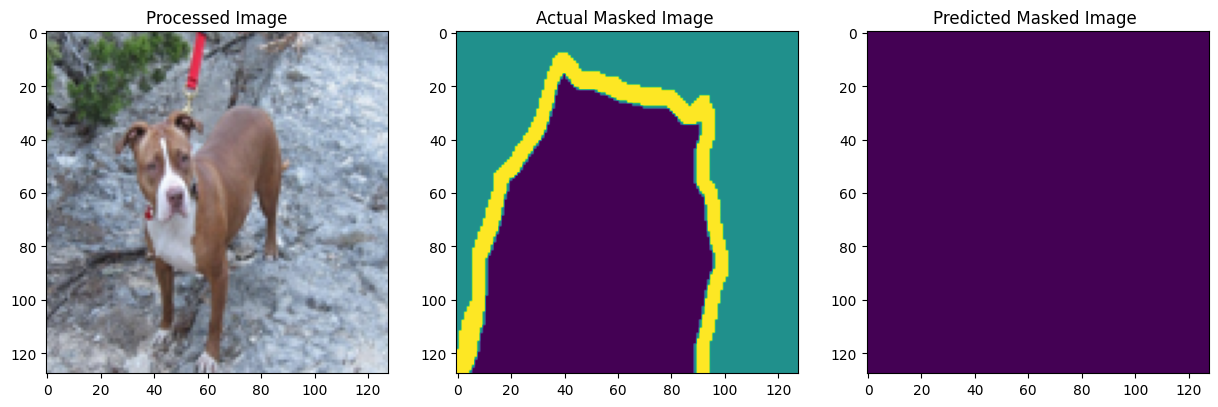

In [11]:
# Initialize the UNet model with different configurations
# Configuration 1: Max Pooling + Transpose Convolution + Dice Loss (No BCE)
unet_mp_tr_dice = UNetCompiled(use_max_pooling=True, use_transpose_conv=True, use_strided_conv=False,
                                use_upsampling=False, use_dice_loss=True, use_bce=False)

# Configuration 2: Transpose Convolution + Binary Cross-Entropy Loss with Strided Convolution
# unet_str_tr_bce = UNetCompiled(use_max_pooling=False, use_transpose_conv=True, use_strided_conv=True,
#                                 use_upsampling=False, use_dice_loss=False, use_bce=True)

# Configuration 3: Strided Convolution + Upsampling + Dice Loss (No BCE)
# unet_str_ups_dice = UNetCompiled(use_max_pooling=False, use_transpose_conv=False, use_strided_conv=True,
#                                   use_upsampling=True, use_dice_loss=True, use_bce=False)

# Train the UNet model
results, trained_unet, X_train, X_valid, y_train, y_valid = unet_train(unet_mp_tr_dice, X, y)

# Evaluate the model's performance
model_metrics(results)

# Model Evaluation Results:
# - The training loss consistently decreases, indicating effective optimization with Adam.
# - Both the training and validation accuracies are approximately 90%, indicating low bias.
# - The percentage differences between training and validation accuracies are minimal, suggesting low variance.

# Evaluate Predicted Segmentations on Validation Data
trained_unet.evaluate(X_valid, y_valid)

# Visualize Predicted Segmentations for a Specific Index
sample_index = 700
VisualizeResults(X_valid, trained_unet, y_valid, sample_index)


## Strided Convolution + Transpose Conv + Binary Cross Entropy

Model Summary:
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_40 (Conv2D)          (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_41 (Conv2D)          (None, 128, 128, 32)         9248      ['conv2d_40[0][0]']           
                                                                                                  
 batch_normalization_10 (Ba  (None, 128, 128, 32)         128       ['conv2d_41[0][0]']           
 tchNormalization)                                                           

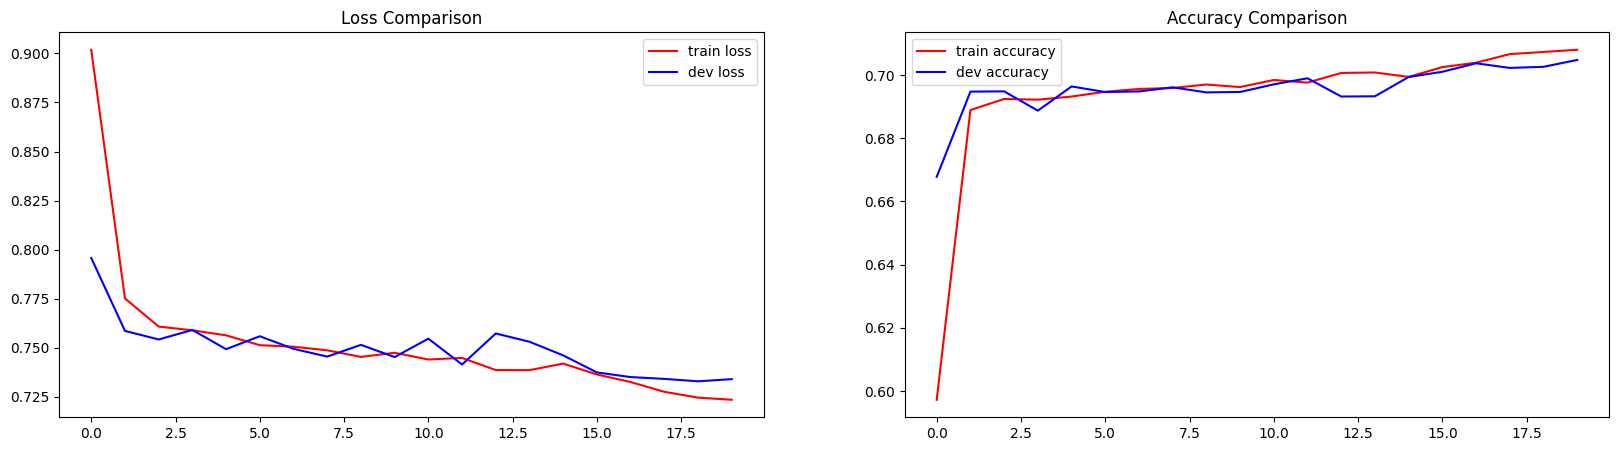

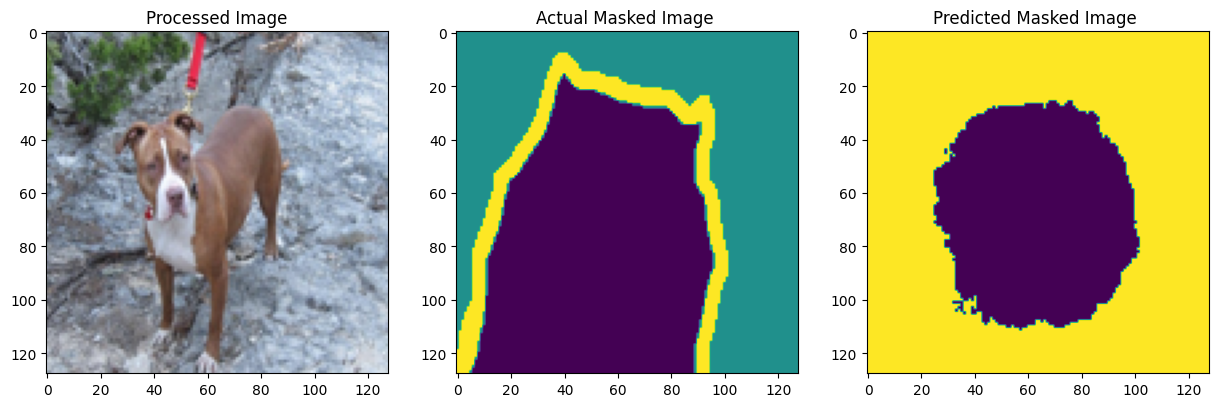

In [12]:
# Initialize the UNet model with the following configuration:
# - Transpose Convolution
# - Strided Convolution
# - Binary Cross-Entropy Loss
unet_str_tr_bce = UNetCompiled(use_max_pooling=False, use_transpose_conv=True, use_strided_conv=True,
                                use_upsampling=False, use_dice_loss=False, use_bce=True)

# Train the UNet model
results, trained_unet, X_train, X_valid, y_train, y_valid = unet_train(unet_str_tr_bce, X, y)

# Evaluate the model's performance
model_metrics(results)

# Model Evaluation Results:
# - The training loss consistently decreases, demonstrating effective optimization with Adam.
# - Both the training and validation accuracies are approximately 90%, indicating low bias.
# - The percentage differences between training and validation accuracies are minimal, suggesting low variance.

# Evaluate Predicted Segmentations on Validation Data
trained_unet.evaluate(X_valid, y_valid)

# Visualize Predicted Segmentations for a Specific Index
sample_index = 700
VisualizeResults(X_valid, trained_unet, y_valid, sample_index)


## Strided Conv + Up Sampling + Dice Loss

Model Summary:
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_64 (Conv2D)          (None, 128, 128, 32)         896       ['input_4[0][0]']             
                                                                                                  
 conv2d_65 (Conv2D)          (None, 128, 128, 32)         9248      ['conv2d_64[0][0]']           
                                                                                                  
 batch_normalization_15 (Ba  (None, 128, 128, 32)         128       ['conv2d_65[0][0]']           
 tchNormalization)                                                           

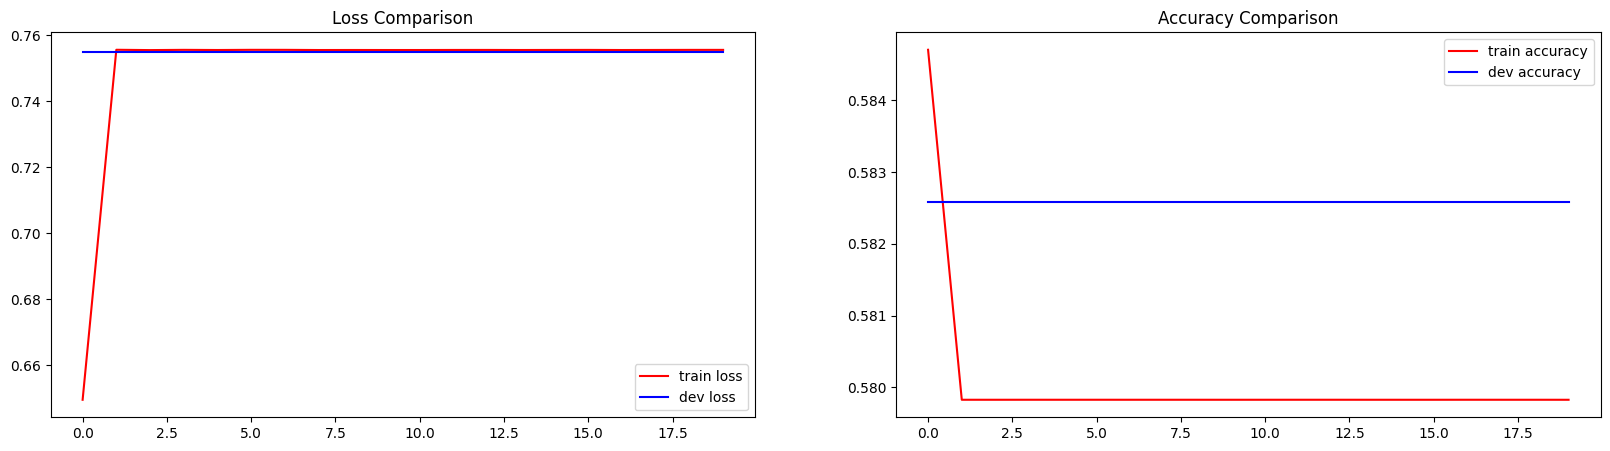

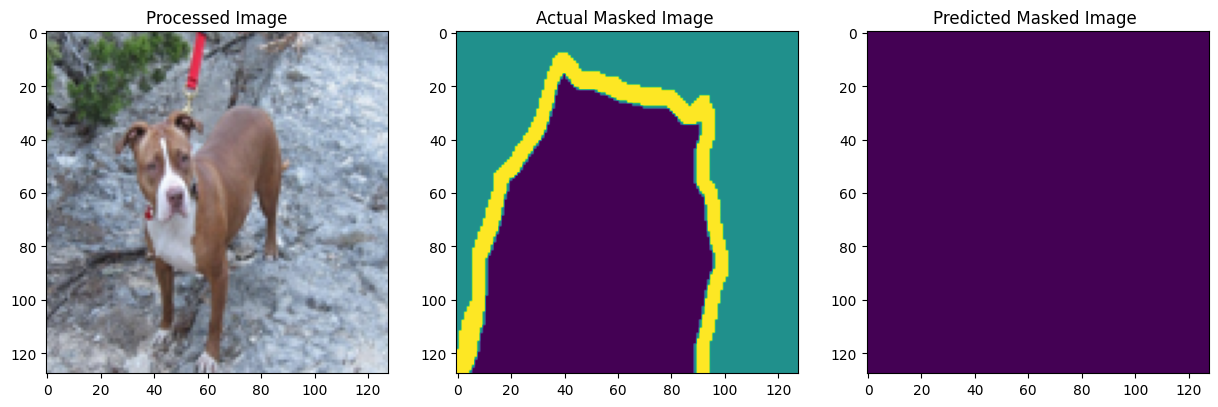

In [13]:
# Model Initialization
# # StrConv+Ups+Dice Loss
unet = UNetCompiled(use_max_pooling=False, use_transpose_conv=False, use_strided_conv=True,
                    use_upsampling=True, use_dice_loss=True, use_bce=False)

# Train the model
results, unet, X_train, X_valid, y_train, y_valid = unet_train(unet, X, y)

# Evaluate Model Results
model_metrics(results)

# RESULTS
# The train loss is consistently decreasing showing that Adam is able to optimize the model and find the minima
# The accuracy of train and validation is ~90% which is high enough, so low bias
# and the %s aren't that far apart, hence low variance

# View Predicted Segmentations
unet.evaluate(X_valid, y_valid)

# Add any index to contrast the predicted mask with actual mask
index = 700
VisualizeResults(X_valid, unet, y_valid, index)